**FitBit health tracker data analysis to identify correlation of excerise and calories**


**Introduction:**
In this project, fitbit heath tracker data is analyzed with R programming and
A graphical representation is made illustrating the correlation between daily walking exercise and the resulting calories burned in the body, demonstrating the impact of physical activity on metabolic expenditure.

>  Data source: /kaggle/input/fitbit

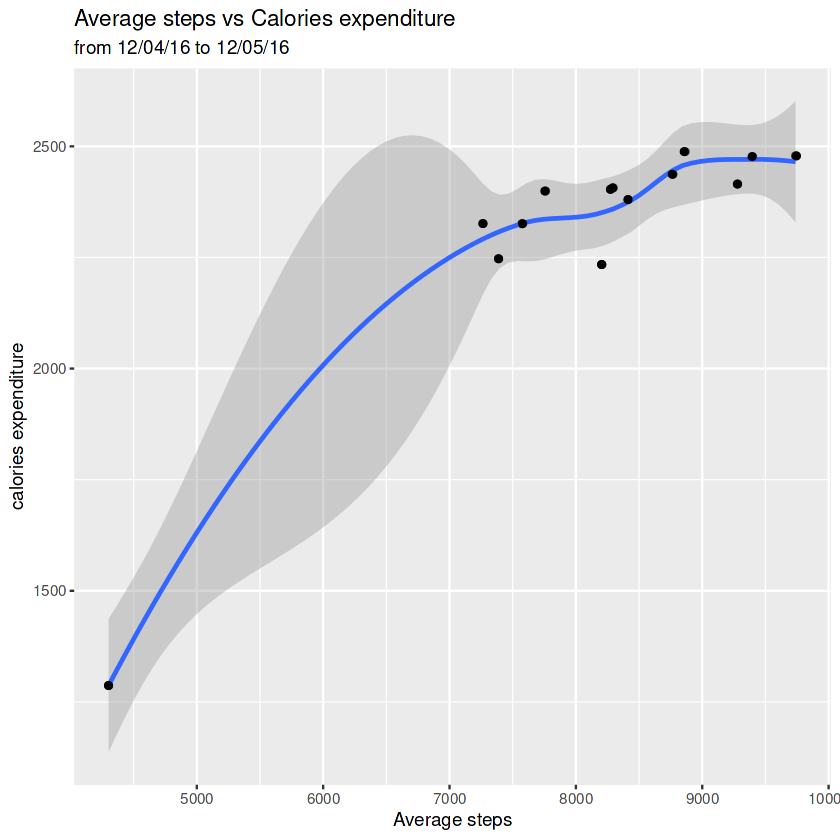

In [4]:
#Package Loading
library(tidyverse)
library(janitor)

#Data upload
dailyactivity <- read.csv("/kaggle/input/dailyactivity/dailyactivity_merged _original.csv")
colnames(dailyactivity)

# Cleaning
## New table
steps_vs_calories <- dailyactivity %>% 
  select(Id, TotalSteps, Calories, ActivityDate)


## Convert ActivityDate to Date
steps_vs_calories$ActivityDate <- as.Date(steps_vs_calories$ActivityDate, format = "%Y-%m-%d")

## Remove rows with 0 steps
filtered_steps_vs_calories <- steps_vs_calories %>%
  filter(TotalSteps != 0)

# Grouping Ids and mean of steps and calories 
final_steps_vs_calories <- filtered_steps_vs_calories %>% 
  group_by( ActivityDate) %>% 
  summarise(total_cal = mean(Calories), total_steps = mean(TotalSteps)) 

# For comparison with Excel results
sum(final_steps_vs_calories$total_steps)

# Display the summary
glimpse(final_steps_vs_calories)
 
# Graphical Illustration
p <- ggplot(final_steps_vs_calories, aes(x = total_steps, y=total_cal))
p + geom_point()+ geom_smooth(method = 'loess', formula = y ~ x)+ geom_jitter() + 
  labs(title = "Average steps vs Calories expenditure", 
       subtitle = "from 12/04/16 to 12/05/16", x= "Average steps", y= "calories expenditure") 



**Conclusions:**
My analysis reveals a clear correlation between daily walking exercise and calories burned, emphasizing the importance of physical activity for metabolic health. Increasing daily steps can lead to greater calorie expenditure, promoting overall fitness and weight management. This underscores the value of incorporating regular exercise into daily routines for improved well-being.